# Multivariate Gaussians

Intuition for multivariate Gaussian distributions

==========================================================================

* **Notebook dependencies**:
    * ...

* **Content**: Jupyter notebook accompanying Chapter 3 of the textbook "Fundamentals of Active Inference"

* **Author**: Sanjeev Namjoshi (sanjeev.namjoshi@gmail.com)

* **Version**: 0.1

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from matplotlib import cm
from scipy.stats import multivariate_normal

mpl.style.use("seaborn-deep")

In Chapter 2 and the early part of Chapter 3, the dimension of the $x$ and $y$ variables have been 1. For example, we dealt with cases where $x = 2$ and $y=6$. The multivariate normal distribution is a generalization of the normal distribution to represent inputs of size $C$, in other words for vector inputs. With the multivariate normal distribution, we deal with vectors $\boldsymbol{x} \in \mathbb{R}^C$ and $\boldsymbol{y} \in \mathbb{R}^D$. 

We interpret $\boldsymbol{x}$ as a vector which represents *states* of the environment. In other words, we now have multiple states that we collect together in a vector. Likewise, $\boldsymbol{y}$ is a vector that represents the *observations* generated by the different states. The way in which these states generate the observations is calculated by the linear mapping between them which we place in the mean of the likelihood.

Don't confuse the multiple elements of the vector with multiple samples. Each individual *sample* from the distribution now returns a *vector*. So if we sample the distribution of $\boldsymbol{x}$ five times we get back 5 vectors, each of which is of length $C$.

First, we construct a grid of possible values over which we want to the distribution to display. Since we are dealing with a bivariate distribution here, the vector of interest only has two elements. We cannot easily visualize distributions with more than two elements. The grid tells us the range of values we wish to plot for each element of the vector. 

We will plot the following distribution:

$$
\boldsymbol{x} \sim \mathcal{N} \left (\boldsymbol{x}; \boldsymbol{\mu} = \begin{bmatrix}
    0 \\ 0
\end{bmatrix}, \boldsymbol{\Sigma}_y = \begin{bmatrix}
    1 & 0 \\ 0 & 1
\end{bmatrix} \right )
$$

As we can see, this distribution specifies that the mean of the first element is centered around zero and the mean of the second element is centered around 0. So the mean should display on a coordinate grid at the point $(0, 0)$. We will investigate the covariance matrix in a moment. Note that the covariance matrix is just an identity matrix (a matrix with just ones across the diagonal) created with the function `np.eye()`. The notation tells us the probability of element of the vector taking on a particular value. Each time we sample the distribution, the first element will have the highest probability of being 0 plus a dispersion (variance) from this mean of 1. Likewise, the second element will also have the highest probability of being 0 plus a variance of 1.

In [3]:
def generate_grid(x_min: int, x_max: int, y_min: int, y_max: int, g_size: float):
    X_grid, Y_grid = np.mgrid[x_min:x_max:g_size, y_min:y_max:g_size]
    grid = np.dstack((X_grid, Y_grid))
    return grid, X_grid, Y_grid

grid, X_grid, Y_grid = generate_grid(x_min=-3, x_max=3, y_min=-3, y_max=3, g_size=0.01)

mu = np.array([0.,0.])
cov = np.eye(2)

samples1 = multivariate_normal.rvs(mu, cov, size=100)
probs1 = multivariate_normal.pdf(grid, mu, cov)

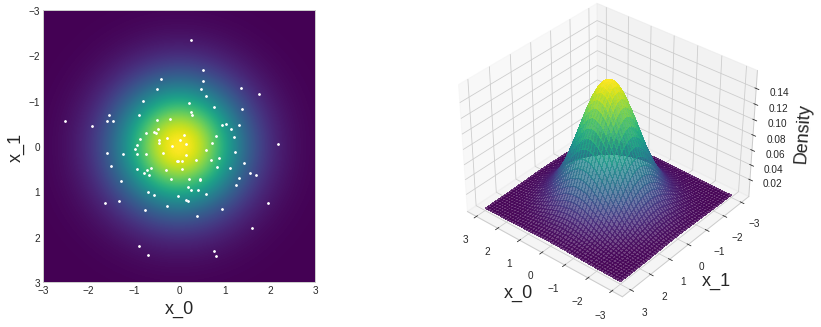

In [6]:
plt.style.use("seaborn-whitegrid")
fig = plt.figure(facecolor=(1,1,1), figsize=(14,5))

x_min, x_max, y_min, y_max = -3, 3, -3, 3

""" LEFT PLOT """
ax = fig.add_subplot(1, 2, 1)
ax.imshow(probs1, origin="lower", cmap="viridis", extent=[x_min,x_max,y_max,y_min])

ax.scatter(samples1[:, 0], samples1[:, 1], c="white", s=3)
plt.grid(None)

# Axis labels
ax.set_xlabel("x_0", fontsize=18)
ax.set_ylabel("x_1", fontsize=18)

""" RIGHT PLOT """
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X_grid, Y_grid, probs1, cmap=cm.viridis, antialiased=False, alpha=0.75)

# Axis labels
ax.set_xlabel("x_0", fontsize=18)
ax.set_ylabel("x_1", fontsize=18)
ax.set_zlabel("Density", fontsize=18)

ax.view_init(35, 130)
ax.dist = 8.5

In the left plot, the dots indicate points samples from this distribution. The right plot shows the left one in 3D. Each axis denotes the probability of the first or second element of the vector $\boldsymbol{x}$ being anywhere from $-3$ to $3$. 

What about the covariance matrices? The covariance matrix affects the way that the samples are spread about the mean. Since we are in two dimensions there are more ways that samples can spread rather than just left to right as we see in univariate distribution. We can compare the shapes of different probability distributions with different covariance matrices easily. Let's make a function that will plot a generic bivariate normal distribution, centered at the origin, for different types of covariance matrices.

In the `BivariateNormal` class, we create grid, create a probability distribution based on a specified covariance matrix, and sample from it. We can then plot each distribution with a different covariance matrix to see what they look like.

In [13]:
class BivariateNormal:
    def __init__(self, cov: np.ndarray) -> None:
        self.cov = cov
        self.mu  = np.array([0., 0.])
        
        self._generate_grid(x_min=-4, x_max=4, y_min=-4, y_max=4, g_size=0.01)
        self._build()
        
    def _generate_grid(self, 
                      x_min: int, x_max: int, 
                      y_min: int, y_max: int, 
                      g_size: float):
        
        X_grid, Y_grid = np.mgrid[x_min:x_max:g_size, y_min:y_max:g_size]
        self.grid = np.dstack((X_grid, Y_grid))
        
    def _build(self):
        self.biv_norm = multivariate_normal(mean=self.mu, cov=self.cov)
    
    def pdf(self):
        self.probs = self.biv_norm.pdf(self.grid)
        
    def sample(self, n: int):
        self.samples = self.biv_norm.rvs(size=n)    
    

In [30]:
# Collect (flattened) covariance matrices of interest 
covs = [
    np.array([1., 0., 0., 1.]),      # Spherical covariances
    np.array([0.5, 0., 0., 7.]),     # Up-down covariances
    np.array([4., 2., 2., 4.]),      # Left-right diagonal covariances
    np.array([1., -0.5, -0.5, 1.])   # Right-left diagonal covariances
]

covs = [c.reshape((2,2)) for c in covs]   # Reshape to 2 x 2

# Initialize probability and sample list for each covariance matrix
probs = []
samples = []

for c in covs:                     # Loop across covariance matrices
    bvn = BivariateNormal(cov=c)   # Initialize with covariance matrix
    bvn.pdf()                      # Compute the pdf probs of the bivariate normal
    bvn.sample(n=30)               # N=30 samples from the bivariate normal
    probs.append(bvn.probs)        # Record pdf probs
    samples.append(bvn.samples)    # Record samples

<Figure size 432x288 with 0 Axes>

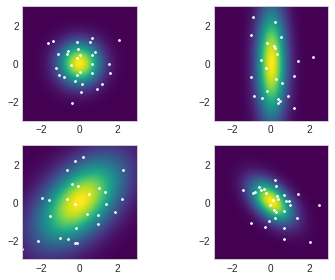

In [31]:
fig = plt.figure()
fig, axes = plt.subplots(2,2, facecolor=(1,1,1))

for i in range(4):

    # Plot PDF probs
    axes.flatten()[i].imshow(probs[i].T, origin="lower", cmap="viridis", extent=[x_min,x_max,x_min,x_max])
    
    # Plot samples
    axes.flatten()[i].scatter(samples[i][:, 0], samples[i][:, 1], c="white", s=3)
    
    # Axis ranges
    axes.flatten()[i].set_xlim(-3, 3)
    axes.flatten()[i].set_ylim(-3, 3)
    axes.flatten()[i].grid(False)

fig.tight_layout()

As we can clearly see, the distributions are still centered around $(0,0)$ but the way that they spread around it varies depending on the covariance matrix we choose. 

* The top-left covariance matrix is **spherical**, also known as **isotropic**. This means all diagonal values are identical so we may sometimes write it as $\sigma^2 \boldsymbol{I}$ denoting a diagonal matrix with the same entries, defined by $\sigma^2$. 
* The top-right covariance matrix is **diagonal**. This means that this matrix only has values on the diagonal but we no longer require these values to be the same. We will sometimes denote this as $\sigma^2_p \boldsymbol{I}$, indicating a vector of variances of size $p$ multipled by the identity matrix (of size $p \times p$).
* The bottom row shows covariance matrices that we will informally call *tilted*. This is a result of filling in the off-diagonal values.

The covariance matrix diagonals are just the variance of each sample (how each element of $\boldsymbol{x}$ varies with itself). But the off-diagonals add in a new twist that was not possible with univariate distributions. It tells us how each element of $\boldsymbol{x}$ varies with the other element in $\boldsymbol{x}$. It is this property that allows us to display more complex shapes of the distributions which are tilted. For distributions with elements greater than $2$ which we cannot visualize the same idea applies.

Diagonal or spherical covariance matrices indicate uncorrelated noise sources. We will frequently use these types of covariance matrices in this book.